In [3]:
#Declaramos primero los paquetes que utilizaremos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Datos de la estacion de Servicio Meteorologico Nacional
df0 = pd.read_csv('Nogales.txt', skiprows=3, sep='\s+') 

In [5]:
df0.head()       

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADS
0,23/01/2019,22:00,329.0,355.0,11.25,25.5,13.5,20.0,877.1,0.0,458.5
1,23/01/2019,23:00,348.0,330.0,10.21,19.1,13.2,17.0,876.7,0.0,255.7
2,24/01/2019,00:00,342.0,336.0,7.79,19.5,11.5,22.0,876.5,0.0,62.3
3,24/01/2019,01:00,322.0,335.0,8.34,19.2,9.6,26.0,876.4,0.0,0.0
4,24/01/2019,02:00,291.0,331.0,6.75,20.0,8.5,30.0,876.7,0.0,0.0


In [6]:
df = pd.DataFrame(df0)

In [7]:
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADS          float64
dtype: object

In [8]:
#Creacion de una columna con la fecha y hora 
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [9]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADS,FECHA
0,329.0,355.0,11.25,25.5,13.5,20.0,877.1,0.0,458.5,2019-01-23 22:00:00
1,348.0,330.0,10.21,19.1,13.2,17.0,876.7,0.0,255.7,2019-01-23 23:00:00
2,342.0,336.0,7.79,19.5,11.5,22.0,876.5,0.0,62.3,2019-01-24 00:00:00
3,322.0,335.0,8.34,19.2,9.6,26.0,876.4,0.0,0.0,2019-01-24 01:00:00
4,291.0,331.0,6.75,20.0,8.5,30.0,876.7,0.0,0.0,2019-01-24 02:00:00


In [10]:
#Analisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADS
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.0,139.000000
mean,219.014388,252.805755,5.822662,14.295683,11.441007,35.064748,873.950360,0.0,165.475540
std,101.864074,95.241636,3.856631,7.726933,5.899899,10.971114,2.089913,0.0,250.783396
min,5.000000,20.000000,0.260000,4.400000,1.400000,14.000000,869.900000,0.0,0.000000
25%,95.500000,197.000000,2.860000,8.000000,6.800000,26.000000,872.400000,0.0,0.000000
50%,246.000000,279.000000,5.080000,11.900000,10.900000,36.000000,873.800000,0.0,0.000000
75%,306.500000,331.500000,7.870000,19.800000,16.200000,44.500000,875.850000,0.0,269.000000
max,355.000000,360.000000,20.590000,38.900000,23.800000,52.000000,877.400000,0.0,780.000000


In [11]:
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADS,FECHA


In [12]:
df.mean()

DIRS    219.014388
DIRR    252.805755
VELS      5.822662
VELR     14.295683
TEMP     11.441007
HR       35.064748
PB      873.950360
PREC      0.000000
RADS    165.475540
dtype: float64

In [13]:
#Calculo del promedio de la temperatura
df.TEMP.mean()

11.441007194244603

In [14]:
#Calculo de la diferencia de temperatura maxima y minima
df.TEMP.max()-df.TEMP.min()

22.400000000000002

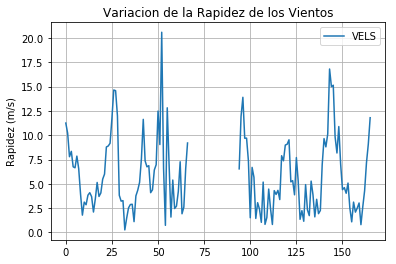

In [15]:
#Grafica de la rapidez de los vientos (m/s)
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variacion de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

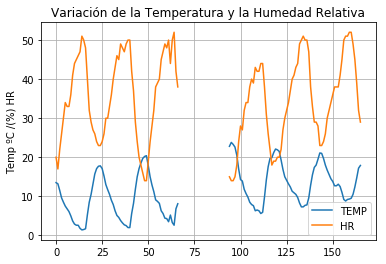

In [16]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

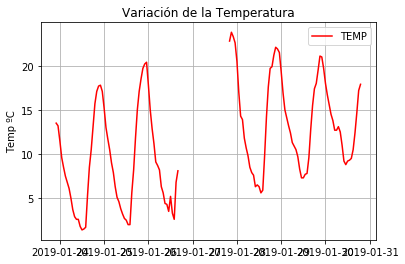

In [17]:
#grafica de variacion de la temperatura
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="r-")
plt.legend(loc='best')
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

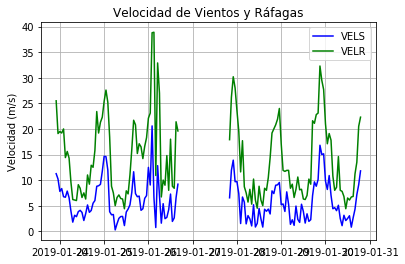

In [19]:
#Grafica de velocidad de vientos y rafagas
plt.plot_date(x=df.FECHA, y=df.VELS, fmt="b-")
plt.plot_date(x=df.FECHA, y=df.VELR, fmt="g-")
plt.legend(loc='best')
plt.title("Velocidad de Vientos y Ráfagas")
plt.ylabel("Velocidad (m/s)")
plt.grid(True)
plt.show()

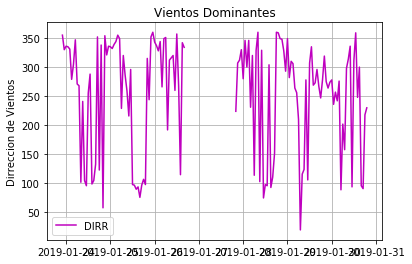

In [20]:
#Grafica de Direccion de Vientos dominantes
plt.plot_date(x=df.FECHA, y=df.DIRR, fmt="m-")
plt.legend(loc='best')
plt.title("Vientos Dominantes")
plt.ylabel("Dirreccion de Vientos")
plt.grid(True)
plt.show()

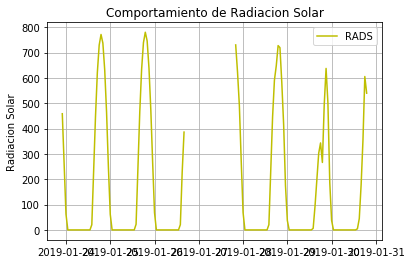

In [21]:
#Grafica de radiacion solar
plt.plot_date(x=df.FECHA, y=df.RADS, fmt="y-")
plt.legend(loc='best')
plt.title("Comportamiento de Radiacion Solar")
plt.ylabel("Radiacion Solar")
plt.grid(True)
plt.show()